In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
df=pd.read_csv("WA_Marketing-Campaign.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [33]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [34]:
df['LocationID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
       101, 102, 103, 104, 105, 106, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 301, 302, 303, 304, 305, 306, 307, 308, 309, 401, 402,
       403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
       501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611,
       612, 613, 614, 615, 701, 702, 703, 704, 705, 706, 707, 708, 709,
       710, 711, 712, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810,
       901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913,
       914, 915, 916, 917, 918, 919, 920], dtype=int64)

In [35]:
df.drop(columns='LocationID',inplace=True,axis='column')

In [36]:
df.head()

,MarketID,MarketSize,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,1,Medium,5,2,1,27.81


In [37]:
df.rename(columns = {'week':'Week'}, inplace = True)

In [38]:
df.head()

,MarketID,MarketSize,AgeOfStore,Promotion,Week,SalesInThousands
0,1,Medium,4,3,1,33.73
1,1,Medium,4,3,2,35.67
2,1,Medium,4,3,3,29.03
3,1,Medium,4,3,4,39.25
4,1,Medium,5,2,1,27.81


In [39]:
df.isnull().sum()

MarketID            0
MarketSize          0
AgeOfStore          0
Promotion           0
Week                0
SalesInThousands    0
dtype: int64

In [40]:
df['MarketID'].value_counts()

3     88
10    80
5     60
6     60
7     60
1     52
8     48
9     40
4     36
2     24
Name: MarketID, dtype: int64

In [41]:
df['MarketSize'].value_counts()

Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64

# CORRELATION ANALYSIS


In [42]:
df.corr()

,MarketID,AgeOfStore,Promotion,Week,SalesInThousands
MarketID,1.000000e+00,-5.029540e-02,-4.659232e-02,-2.688119e-16,-0.192389
AgeOfStore,-5.029540e-02,1.000000e+00,5.976484e-02,5.420672e-17,-0.028533
Promotion,-4.659232e-02,5.976484e-02,1.000000e+00,3.842310e-17,-0.059212
Week,-2.688119e-16,5.420672e-17,3.842310e-17,1.000000e+00,-0.010984
SalesInThousands,-1.923885e-01,-2.853288e-02,-5.921195e-02,-1.098354e-02,1.000000


<AxesSubplot:>

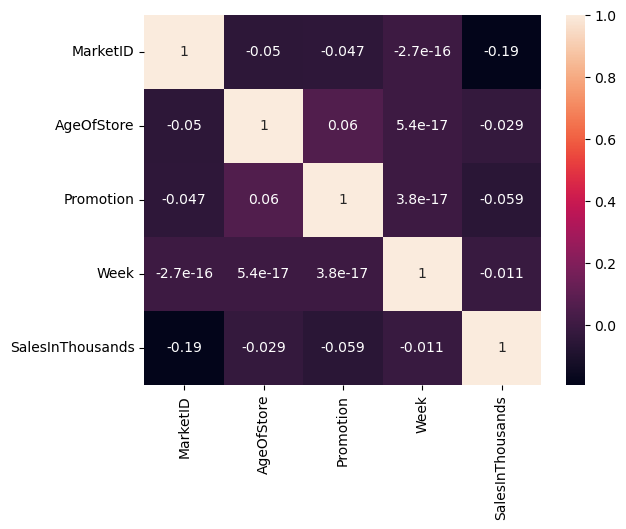

In [43]:
sns.heatmap(df.corr(),annot=True)

So it is evident from the heatmap above that 
sales is negatively correlated with age  of store and promotion
Meaning that sales is inversely proportional to ageof store and Promotion technique

In [44]:
df['Promotion'].value_counts()

3    188
2    188
1    172
Name: Promotion, dtype: int64

Text(0, 0.5, 'Total sales in Thousands')

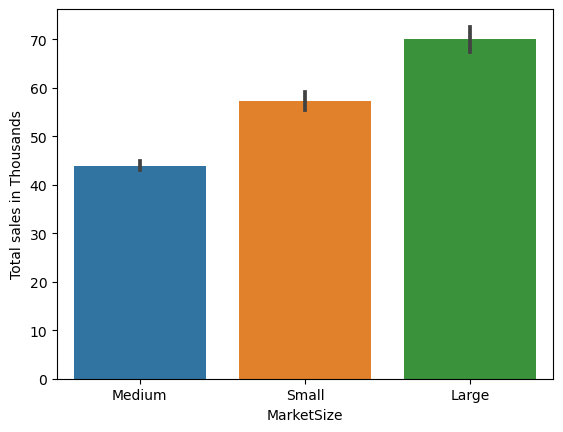

In [45]:
sns.barplot(x='MarketSize',y='SalesInThousands',data=df)
plt.ylabel("Total sales in Thousands")

so it is quite interesting to see that the small markets are making more revenue in comparison of medium markets

Text(0, 0.5, 'Total sales in Thousands')

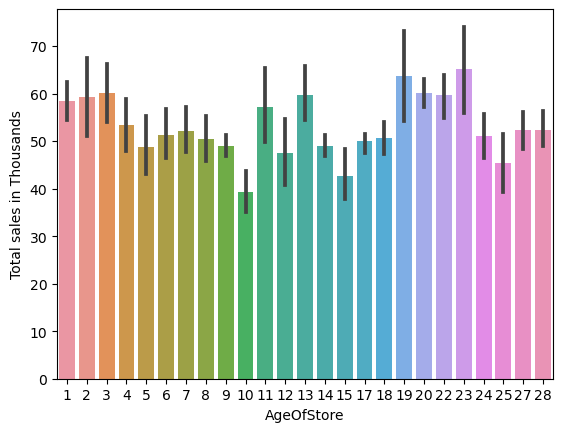

In [46]:
sns.barplot(x='AgeOfStore',y='SalesInThousands',data=df)
plt.ylabel("Total sales in Thousands")

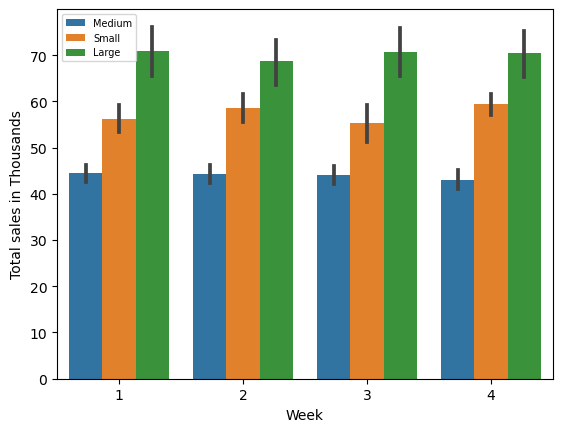

In [47]:
sns.barplot(x='Week',y='SalesInThousands',hue='MarketSize',data=df)
plt.ylabel("Total sales in Thousands")
plt.legend(loc='upper left',fontsize=7)

<AxesSubplot:xlabel='Promotion', ylabel='count'>

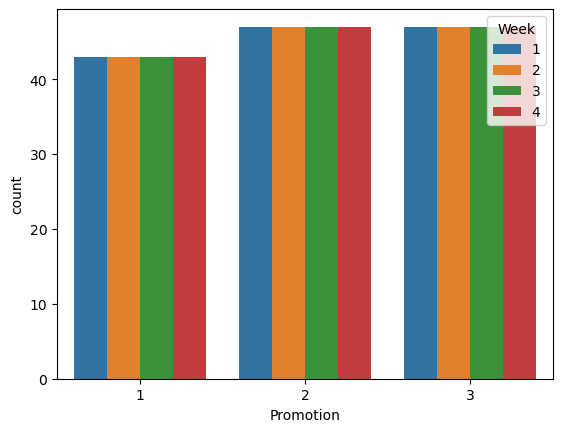

In [48]:
sns.countplot(x='Promotion',hue='Week',data=df)

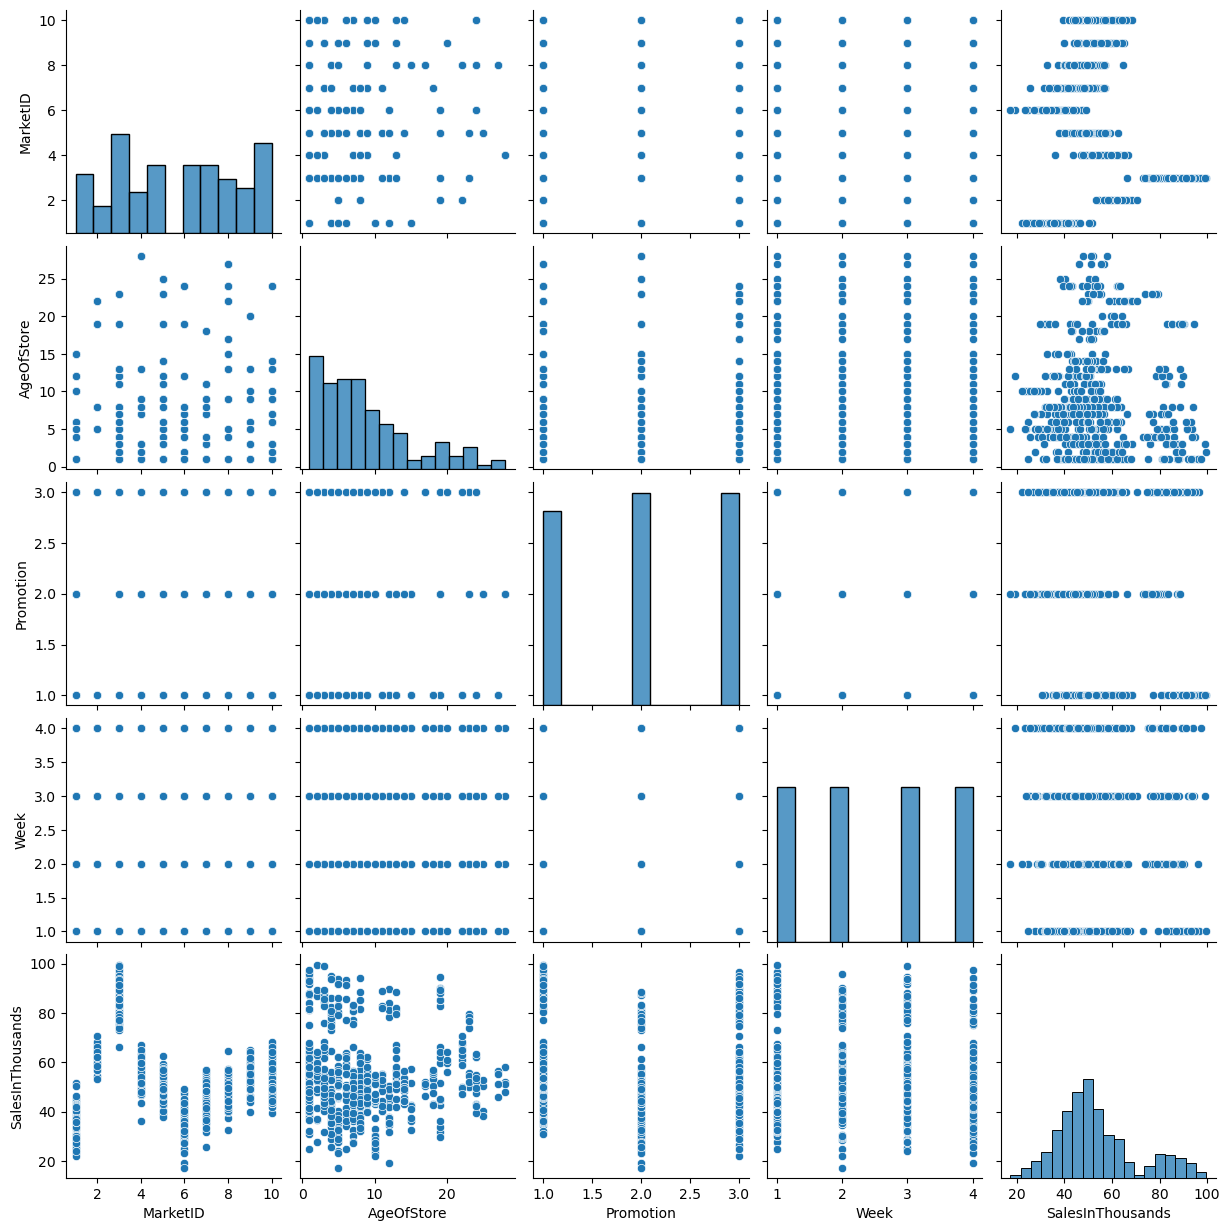

In [49]:
sns.pairplot(data=df)

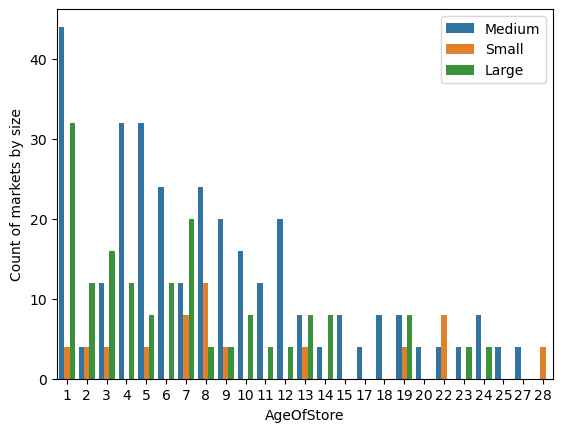

In [50]:
sns.countplot(x='AgeOfStore',hue='MarketSize',data=df)

plt.ylabel("Count of markets by size")
plt.legend(loc='upper right')



the graph indicate that the as the age of the store increases medium markets are able to produce more sustainable buisness

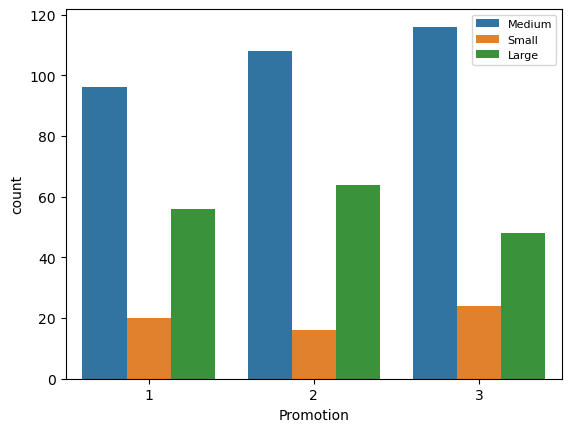

In [51]:
sns.countplot(x='Promotion',hue='MarketSize',data=df)
plt.legend(fontsize=8,loc='upper right')


# A/B Testing

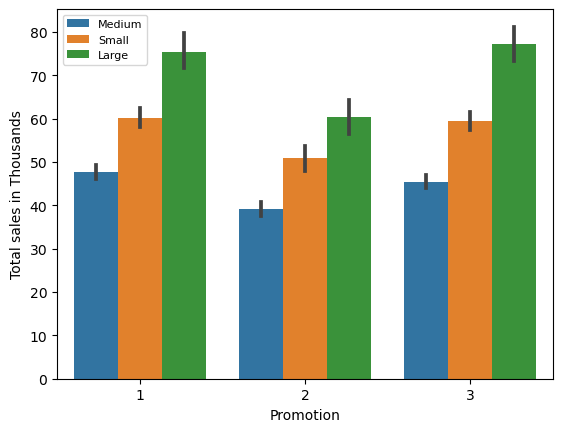

In [52]:
sns.barplot(x='Promotion',y='SalesInThousands',hue='MarketSize',data=df)
plt.ylabel("Total sales in Thousands")
plt.legend(fontsize=8,loc="upper left")

Inspite of having highest promotion strategy in medium markets they are not producing that amount of profthe markit in comparison of small markets and large markets.In fact,small markets tend to perform better than medium under less promotion in each technique.
It is better to perform more promotion in small markets rather than in medium markets for more profits.


Small markets have best sales to promotion count ratio,followed by large market and then finally medium markets

In [53]:
groupA = df[df['Promotion'] == 1]['SalesInThousands']
groupB = df[df['Promotion'] == 2]['SalesInThousands']
groupC = df[df['Promotion'] == 3]['SalesInThousands']

In [54]:
from scipy import stats
ttest1 = stats.ttest_ind(groupA,groupB, equal_var = True)
ttest1

Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)

In [56]:
tttest2 = stats.ttest_ind(groupA,groupC, equal_var = True)
tttest2

Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313273)

In [57]:
ttest3 = stats.ttest_ind(groupB,groupC, equal_var = True)
ttest3

Ttest_indResult(statistic=-4.88139271089348, pvalue=1.562894303627738e-06)

# CONCLUSION

Based on the hypothesis testing results, there is a significant difference between promotions 1 and 2, indicating different approaches to the target market and resulting sales. Meanwhile, promotions 1 and 3 did not show a significant difference, suggesting that either promotion 1 or 3 could be maintained, alongside promotion 2, to achieve maximum sales with different target markets.

This statement summarizes the findings from A/B testing, highlighting the significant performance disparity between promotions 1 and 2, while promotions 1 and 3 perform similarly. Therefore, maintaining either promotion 1 or 3, alongside promotion 2, is recommended to cater to varying target markets effectively.